In [64]:
import pandas as pd                                             
import numpy as np    
import os
import random
import string
random.seed(123)
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
train_dt = pd.read_csv("Train_data.csv")

In [66]:
test_dt = pd.read_csv("Test_data.csv")

In [67]:
train_dt.head(4)

,client_id,totalizer,Totalizer_0,Totalizer_N,Totalizer_Y,Single_client,Multi_client,client count,duration,revisions,...,obs_8,obs_99,obs_3.0,obs_6.0,obs_5.0,obs_4.0,average_std_6months,substancian,age,Lossy
0,33128,Y,0,0,1,0,1,1,25.23,1,...,0,0,0,0,0,0,64,CUBA,92.90,0
1,17414,Y,0,0,1,0,1,58,3.83,11,...,0,0,0,0,0,0,53,CENTRO,72.81,0
2,16481,N,0,1,0,1,0,0,-26.60,26,...,0,0,0,0,0,0,0,NARANJITO,1.13,0
3,35413,Y,0,0,1,0,1,12,30.35,10,...,0,0,0,0,0,0,0,CUBA,88.03,0


In [68]:
test_dt.head(4)

,row_id,client_id,totalizer,Totalizer_0,Totalizer_N,Totalizer_Y,Single_client,Multi_client,client count,duration,...,obs_-,obs_8,obs_99,obs_3.0,obs_6.0,obs_5.0,obs_4.0,average_std_6months,substancian,age
0,1,1995,N,0,1,0,0,1,1,20.52,...,0,0,0,0,0,0,0,4342,DOSQUEBRADAS,5.42
1,2,42777,Y,0,0,1,1,0,0,-44.83,...,0,0,0,0,0,0,0,21,CUBA,33.43
2,3,32248,Y,0,0,1,1,0,0,6.97,...,0,0,0,0,0,0,0,10,NARANJITO,139.58
3,4,46962,Y,0,0,1,1,0,0,0.00,...,0,0,0,0,0,0,0,23,CUBA,30.29


### To check for the basic statistical distribution of the data

In [69]:
train_dt.describe()

,client_id,Totalizer_0,Totalizer_N,Totalizer_Y,Single_client,Multi_client,client count,duration,revisions,revision_month,...,obs_-,obs_8,obs_99,obs_3.0,obs_6.0,obs_5.0,obs_4.0,average_std_6months,age,Lossy
count,60748.000000,60748.000000,60748.000000,60748.000000,60748.000000,60748.000000,60748.000000,60748.000000,60748.000000,60748.000000,...,60748.0,60748.0,60748.0,60748.0,60748.0,60748.000000,60748.000000,60748.000000,60748.000000,60748.000000
mean,24441.639889,0.039442,0.170788,0.789771,0.761325,0.238675,8.398021,11.142868,10.935076,5.910400,...,0.0,0.0,0.0,0.0,0.0,0.000016,0.000082,278.051590,236.043560,0.065187
std,15030.869884,0.194645,0.376326,0.407475,0.426277,0.426277,25.706196,24.807974,9.969689,3.282716,...,0.0,0.0,0.0,0.0,0.0,0.004057,0.009072,8512.237348,3705.068938,0.246858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-2263.800000,0.000000
25%,11267.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-4.400000,1.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.000000,11.800000,0.000000
50%,23568.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,10.380000,10.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,19.000000,66.260000,0.000000
75%,37173.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.370000,23.000000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,50.000000,104.330000,0.000000
max,51785.000000,1.000000,1.000000,1.000000,1.000000,1.000000,320.000000,59.980000,37.000000,12.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,925828.000000,87805.110000,1.000000


In [70]:
test_dt.describe()

,row_id,client_id,Totalizer_0,Totalizer_N,Totalizer_Y,Single_client,Multi_client,client count,duration,revisions,...,obs_7,obs_-,obs_8,obs_99,obs_3.0,obs_6.0,obs_5.0,obs_4.0,average_std_6months,age
count,26036.00000,26036.000000,26036.000000,26036.000000,26036.000000,26036.000000,26036.000000,26036.000000,26036.000000,26036.000000,...,26036.0,26036.0,26036.0,26036.0,26036.0,26036.0,26036.0,26036.000000,26036.000000,26036.000000
mean,13018.50000,24480.787295,0.040982,0.171186,0.787832,0.764518,0.235482,8.061761,11.057400,11.003380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000038,275.549355,221.214592
std,7516.09014,15003.466553,0.198252,0.376679,0.408851,0.424308,0.424308,24.778903,24.776851,9.954002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006197,8307.602223,3533.258362
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.630000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-2254.290000
25%,6509.75000,11387.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-4.505000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.000000,11.290000
50%,13018.50000,23639.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,10.400000,11.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,18.000000,66.035000
75%,19527.25000,37084.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.200000,23.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,50.000000,103.877500
max,26036.00000,51781.000000,1.000000,1.000000,1.000000,1.000000,1.000000,320.000000,59.980000,37.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,925631.000000,87792.070000


### To check for the data range and data type

In [71]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60748 entries, 0 to 60747
Columns: 197 entries, client_id to Lossy
dtypes: float64(4), int64(189), object(4)
memory usage: 91.3+ MB


In [72]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26036 entries, 0 to 26035
Columns: 197 entries, row_id to age
dtypes: float64(4), int64(189), object(4)
memory usage: 39.1+ MB


### Data shape 

In [73]:
train_dt.shape

(60748, 197)

In [74]:
test_dt.shape

(26036, 197)

### Value counts to the entire data 

In [75]:
#checking for distribution of data in each columns and their respective counts.
for i in train_dt.columns.values:
    print (i)
    print (pd.value_counts(train_dt[i].values,))
    print (len(train_dt[i].unique()))
    print ("****************************************")

client_id
7376     35
1006     33
8910     31
5421     29
688      29
         ..
1075      1
11318     1
9271      1
23608     1
40996     1
Length: 40626, dtype: int64
40626
****************************************
totalizer
Y    47977
N    10375
0     2396
dtype: int64
3
****************************************
Totalizer_0
0    58352
1     2396
dtype: int64
2
****************************************
Totalizer_N
0    50373
1    10375
dtype: int64
2
****************************************
Totalizer_Y
1    47977
0    12771
dtype: int64
2
****************************************
Single_client
1    46249
0    14499
dtype: int64
2
****************************************
Multi_client
0    46249
1    14499
dtype: int64
2
****************************************
client count
0     46249
1      2526
2       717
3       475
5       427
      ...  
90        2
64        2
86        1
89        1
71        1
Length: 107, dtype: int64
107
****************************************
duration
 0.00 

2
****************************************
irr_151
0    60743
1        5
dtype: int64
2
****************************************
irr_167
0    60747
1        1
dtype: int64
2
****************************************
irr_176
0    60745
1        3
dtype: int64
2
****************************************
irr_182
0    60748
dtype: int64
1
****************************************
irr_187
0    60681
1       67
dtype: int64
2
****************************************
irr_192
0    58550
1     2198
dtype: int64
2
****************************************
irr_196
0    60727
1       21
dtype: int64
2
****************************************
irr_200
0    60742
1        6
dtype: int64
2
****************************************
irr_204
0    60733
1       15
dtype: int64
2
****************************************
irr_208
0    58187
1     2561
dtype: int64
2
****************************************
irr_30
0    60748
dtype: int64
1
****************************************
irr_32
0    60748
dtype: int64
1
*

obs_I
0    60748
dtype: int64
1
****************************************
obs_R
0    60739
1        9
dtype: int64
2
****************************************
obs_U
0    60458
1      290
dtype: int64
2
****************************************
obs_2
0    60714
1       34
dtype: int64
2
****************************************
obs_X
0    60710
1       38
dtype: int64
2
****************************************
obs_S
0    60631
1      117
dtype: int64
2
****************************************
obs_T
0    60742
1        6
dtype: int64
2
****************************************
obs_1
0    60748
dtype: int64
1
****************************************
obs_9
0    60709
1       39
dtype: int64
2
****************************************
obs_V
0    60744
1        4
dtype: int64
2
****************************************
obs_=
0    60748
dtype: int64
1
****************************************
obs_7
0    60748
dtype: int64
1
****************************************
obs_-
0    60748
dtype: int64
1
****

In [76]:
#checking for distribution of data in each columns and their respective counts.
for i in test_dt.columns.values:
    print (i)
    print (pd.value_counts(test_dt[i].values,))
    print (len(test_dt[i].unique()))
    print ("****************************************")

row_id
2047     1
13612    1
11535    1
21792    1
23841    1
        ..
21151    1
10928    1
8881     1
15026    1
2049     1
Length: 26036, dtype: int64
26036
****************************************
client_id
688      16
8910     15
7376     15
6178     14
5421     14
         ..
14781     1
43455     1
29124     1
46284     1
43037     1
Length: 21254, dtype: int64
21254
****************************************
totalizer
Y    20512
N     4457
0     1067
dtype: int64
3
****************************************
Totalizer_0
0    24969
1     1067
dtype: int64
2
****************************************
Totalizer_N
0    21579
1     4457
dtype: int64
2
****************************************
Totalizer_Y
1    20512
0     5524
dtype: int64
2
****************************************
Single_client
1    19905
0     6131
dtype: int64
2
****************************************
Multi_client
0    19905
1     6131
dtype: int64
2
****************************************
client count
0      19905
1 

2
****************************************
irr_187
0    26006
1       30
dtype: int64
2
****************************************
irr_192
0    25073
1      963
dtype: int64
2
****************************************
irr_196
0    26027
1        9
dtype: int64
2
****************************************
irr_200
0    26034
1        2
dtype: int64
2
****************************************
irr_204
0    26029
1        7
dtype: int64
2
****************************************
irr_208
0    24981
1     1055
dtype: int64
2
****************************************
irr_30
0    26036
dtype: int64
1
****************************************
irr_32
0    26036
dtype: int64
1
****************************************
irr_60
0    26036
dtype: int64
1
****************************************
irr_88
0    26036
dtype: int64
1
****************************************
irr_2
0    26036
dtype: int64
1
****************************************
irr_34
0    25992
1       44
dtype: int64
2
****************************

1431
****************************************
substancian
CUBA                 6997
VENTORRILLO          5760
DOSQUEBRADAS         5687
CENTRO               2802
NARANJITO            2435
PAVAS                2033
SUBESTACION BADEA     173
POPA                   82
MACARENA               64
SUBESTACION PAVAS       2
CAMPESTRE               1
dtype: int64
11
****************************************
age
0.00      2188
0.13        99
0.77        86
0.10        86
0.68        77
          ... 
99.37        1
102.21       1
28.47        1
47.45        1
70.73        1
Length: 7943, dtype: int64
7943
****************************************


### Column names

In [77]:
train_dt.columns

Index(['client_id', 'totalizer', 'Totalizer_0', 'Totalizer_N', 'Totalizer_Y',
       'Single_client', 'Multi_client', 'client count', 'duration',
       'revisions',
       ...
       'obs_8', 'obs_99', 'obs_3.0', 'obs_6.0', 'obs_5.0', 'obs_4.0',
       'average_std_6months', 'substancian', 'age', 'Lossy'],
      dtype='object', length=197)

In [78]:
test_dt.columns

Index(['row_id', 'client_id', 'totalizer', 'Totalizer_0', 'Totalizer_N',
       'Totalizer_Y', 'Single_client', 'Multi_client', 'client count',
       'duration',
       ...
       'obs_-', 'obs_8', 'obs_99', 'obs_3.0', 'obs_6.0', 'obs_5.0', 'obs_4.0',
       'average_std_6months', 'substancian', 'age'],
      dtype='object', length=197)

### null values in train data and test data

In [79]:
#missing values.
train_dt.apply(lambda x: sum(x.isnull()),axis=0)


client_id              0
totalizer              0
Totalizer_0            0
Totalizer_N            0
Totalizer_Y            0
                      ..
obs_4.0                0
average_std_6months    0
substancian            0
age                    0
Lossy                  0
Length: 197, dtype: int64

In [80]:
#missing values.
test_dt.apply(lambda x: sum(x.isnull()),axis=0)


row_id                 0
client_id              0
totalizer              0
Totalizer_0            0
Totalizer_N            0
                      ..
obs_5.0                0
obs_4.0                0
average_std_6months    0
substancian            0
age                    0
Length: 197, dtype: int64

### checking for the duplicate rows in the data

In [81]:
train_dt.duplicated().value_counts()

False    59420
True      1328
dtype: int64

In [82]:
test_dt.duplicated().value_counts()

False    26036
dtype: int64

### There are 1328 duplicate rows in the data

In [83]:
train_dt = train_dt.drop_duplicates()

In [84]:
train_dt.duplicated().value_counts()

False    59420
dtype: int64

All the duplicate rows are now removed

## Exploratory data analysis

In [85]:
train_dt.groupby('client_id', as_index=False)["client count"].sum()

,client_id,client count
0,0,360
1,1,0
2,2,0
3,4,0
4,5,0
5,7,2
6,8,0
7,9,0
8,10,0
9,11,0


### From this we can see that there certain client id which are repeated and have more number of meters

## Total irr count and obs count in train and test data 

In [86]:
train_dt['Total_irr_codes_count']= train_dt.iloc[:, 21:151].sum(axis=1)

In [87]:
test_dt['Total_irr_codes_count']= test_dt.iloc[:, 22:152].sum(axis=1)

In [88]:
train_dt['Total_obs_codes_count']= train_dt.iloc[:, 152:194].sum(axis=1)

test_dt['Total_obs_codes_count']= test_dt.iloc[:, 152:195].sum(axis=1)

### here instead of concidering all the individual irr_codes_count and obs_codes_count a summation observation new column would give a better prediction on  the target 

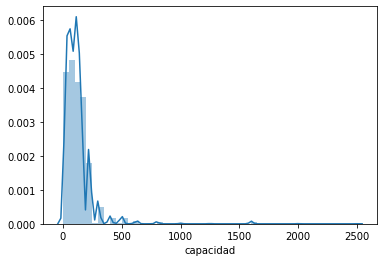

In [89]:
sns.distplot(train_dt['capacidad'])

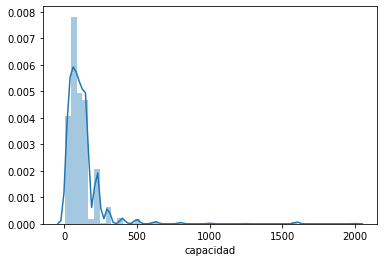

In [90]:
sns.distplot(test_dt['capacidad'])

### here wecan see that huge majority of capacidad lies between 0 to 500 only 

In [92]:
train_dt.columns

Index(['client_id', 'totalizer', 'Totalizer_0', 'Totalizer_N', 'Totalizer_Y',
       'Single_client', 'Multi_client', 'client count', 'duration',
       'revisions',
       ...
       'obs_3.0', 'obs_6.0', 'obs_5.0', 'obs_4.0', 'average_std_6months',
       'substancian', 'age', 'Lossy', 'Total_irr_codes_count',
       'Total_obs_codes_count'],
      dtype='object', length=199)

In [93]:
train_dt_1 = train_dt[[ 'totalizer',  'duration', 'clase_servicio', 'client count','capacidad']]
train_dt_1.head()

,totalizer,duration,clase_servicio,client count,capacidad
0,Y,25.23,2,1,150.0
1,Y,3.83,2,58,225.0
2,N,-26.60,1,0,15.0
3,Y,30.35,2,12,112.5
4,Y,-43.63,1,0,150.0


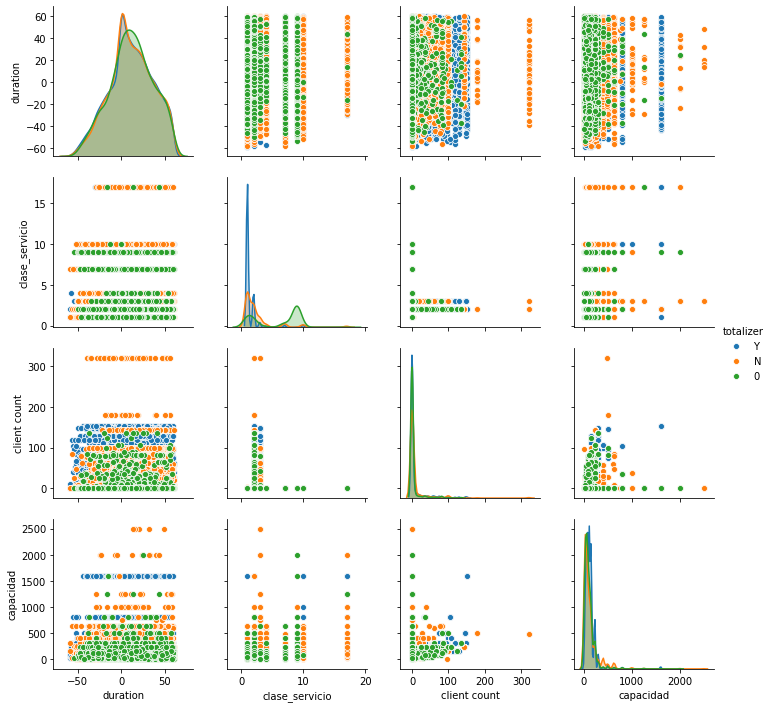

In [36]:
sns.pairplot(train_dt_1, hue='totalizer',height=2.5)

## Totalizer

In [95]:
#frequency distribution of totalizer
train_dt["totalizer"].value_counts()

Y    46980
N    10090
0     2350
Name: totalizer, dtype: int64

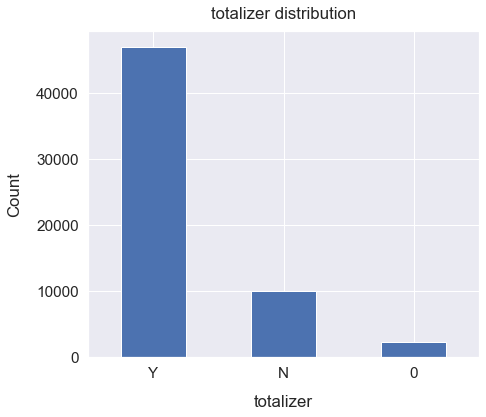

In [103]:
#barplot representing distribution of totalizer with lossy
import seaborn as sns
sns.set(font_scale=1.4)
train_dt["totalizer"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("totalizer", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("totalizer distribution", y=1.02);

In [97]:
#correalion table 
pd.crosstab(train_dt.totalizer, train_dt.Lossy)

Lossy,0,1
totalizer,,
0,2182,168
N,9334,756
Y,44077,2903


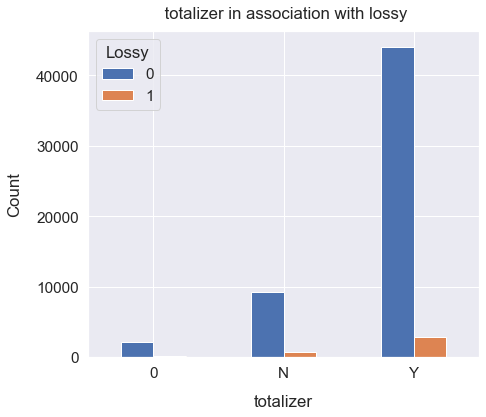

In [98]:
#distribution of totalizer in association with lossy
sns.set(font_scale=1.4)
pd.crosstab(train_dt.totalizer, train_dt.Lossy).plot(kind='bar',figsize=(7, 6), rot=0)

plt.xlabel("totalizer", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title(" totalizer in association with lossy", y=1.02);

In [99]:
import scipy.stats as ss

In [100]:
#Used this feature to check for the correlation between categorical column on our target feature

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [101]:
#correlation percentage with the help of chi_square test
cramers_v(train_dt.totalizer, train_dt.Lossy)

0.02001922231697704

#### Only 2% of the data in totlizer is correlated with lossy 

## Client count

In [102]:
#frequency distribution of client count
train_dt["client count"].value_counts()

0     45297
1      2418
2       687
3       463
5       417
      ...  
90        2
64        2
86        1
89        1
71        1
Name: client count, Length: 107, dtype: int64

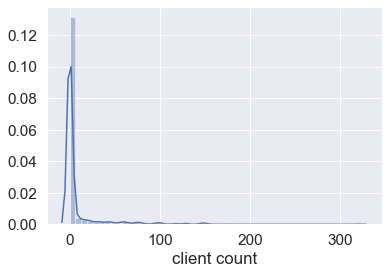

In [105]:
sns.distplot(train_dt['client count'])

In [107]:
#correlation table 
pd.crosstab(train_dt["client count"], train_dt.Lossy)

Lossy,0,1
client count,,
0,42431,2866
1,2213,205
2,637,50
3,437,26
4,337,23
5,373,44
6,264,28
7,260,14
8,281,21


In [108]:
#correlation percentage with the help of chi_square test
cramers_v(train_dt["client count"], train_dt.Lossy)

0.030641676827361745

#### only 3% of the data is correlated with the lossy target column

### Single client and multiple client

In [109]:
train_dt["Single_client"].value_counts()

1    45297
0    14123
Name: Single_client, dtype: int64

In [110]:
train_dt.Multi_client.value_counts()

0    45297
1    14123
Name: Multi_client, dtype: int64

### here single client and multiple client distribution is exactly opposite so we can either of the one column in predicting the lossy target column 

In [111]:
train_dt = train_dt.drop(["Single_client"],axis = 1) 
test_dt = test_dt.drop(["Single_client"],axis = 1) 


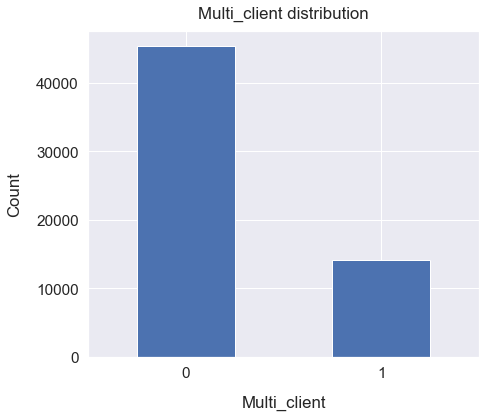

In [112]:
#barplot representing distribution of Multi_client with lossy
import seaborn as sns
sns.set(font_scale=1.4)
train_dt["Multi_client"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Multi_client", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Multi_client distribution", y=1.02);

In [113]:
#correalion table 
pd.crosstab(train_dt.Multi_client, train_dt.Lossy)

Lossy,0,1
Multi_client,,
0,42431,2866
1,13162,961


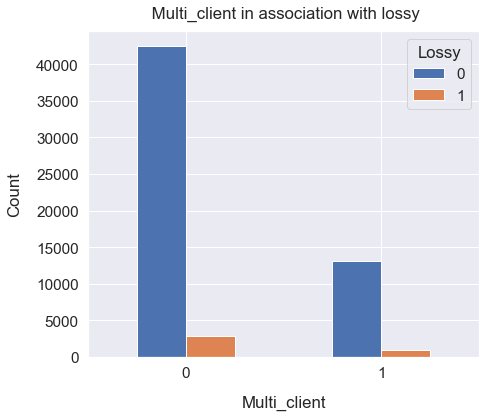

In [114]:
#distribution of Multi_client in association with lossy
sns.set(font_scale=1.4)
pd.crosstab(train_dt.Multi_client, train_dt.Lossy).plot(kind='bar',figsize=(7, 6), rot=0)

plt.xlabel("Multi_client", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title(" Multi_client in association with lossy", y=1.02);

In [115]:
#correlation percentage with the help of chi_square test
cramers_v(train_dt.Multi_client, train_dt.Lossy)

0.00709698043716775

### duration 

In [116]:
train_dt["duration"].value_counts()

 0.00     1855
 0.05       30
 1.03       28
 0.43       28
 4.28       28
          ... 
-52.80       1
-41.30       1
-47.85       1
-36.27       1
-45.08       1
Name: duration, Length: 6652, dtype: int64

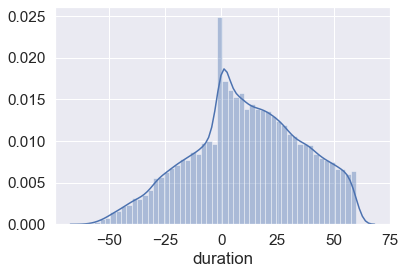

In [117]:
sns.distplot(train_dt['duration'])

In [119]:
#correlation percentage with the help of chi_square test
cramers_v(train_dt.duration, train_dt.Lossy)

0.046311004848019886

### max consumption and min consumption

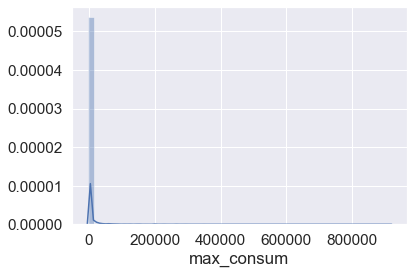

In [120]:
sns.distplot(train_dt['max_consum'])

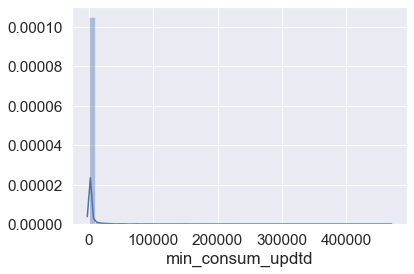

In [121]:
sns.distplot(train_dt['min_consum_updtd'])

In [123]:
#correalion table 
cramers_v(train_dt.max_consum, train_dt.min_consum_updtd)

0.7659286315916857

In [124]:
cramers_v(train_dt.min_consum, train_dt.min_consum_updtd)

0.9996739780029634

###  here we can see that the column min consum is alomost same as updated one and it is also 76% correlated with the  max consumption

In [126]:
#correlation with the target attributed
cramers_v(train_dt.max_consum, train_dt.Lossy)


0.14376178148641872

In [127]:
#correlation with the target attributed
cramers_v(train_dt.min_consum, train_dt.Lossy)

0.13534021727207166

In [ ]:
train_dt.groupby('city', as_index=False)["total_cases"].sum()

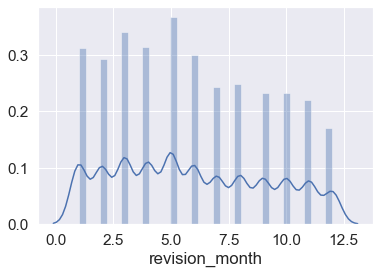

In [133]:
sns.distplot(train_dt['revision_month'])



In [137]:
cramers_v(train_dt.revision_month, train_dt.Lossy)

0.03082814184474987

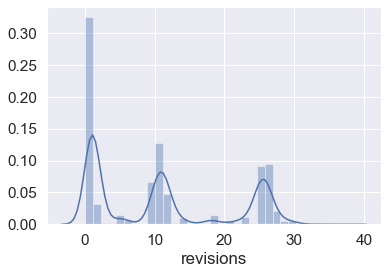

In [134]:
sns.distplot(train_dt['revisions'])


In [141]:
cramers_v(train_dt.revisions, train_dt.Lossy)

0.9997475193738636

## Here we can see that the column revisions is highly correlated with the target attribute 
1. Therefore the revisions column can be used in classifying our target attributed
2. we can bin the data depending on the distributionn and according we can make the prediction out of it.

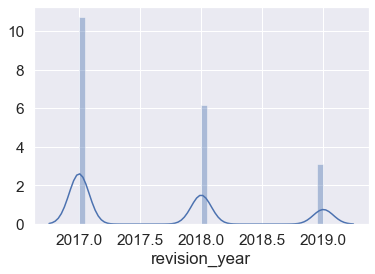

In [135]:
sns.distplot(train_dt['revision_year'])


In [142]:
cramers_v(train_dt.revision_year, train_dt.Lossy)

0.061629288281880044

here we can see certain trend in the attributes such as revision month and year


1. Herefore the trend can hold good chances in predicting the target attribute
2. Also insted of considering second half year in predicting our target attribute we can use the data from the first half of each year. 

### close service

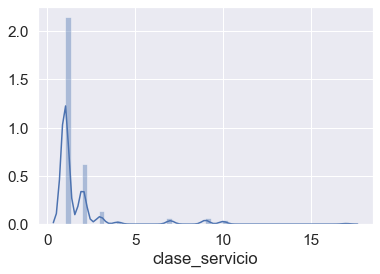

In [136]:
sns.distplot(train_dt['clase_servicio'])


In [143]:
cramers_v(train_dt.clase_servicio, train_dt.Lossy)

0.03043987772037629

### Factor multiplication

In [144]:
#frequency distribution of totalizer
train_dt["factor_multiplicacion"].value_counts()

Direct         54646
Semi-direct     3656
Indirect        1118
Name: factor_multiplicacion, dtype: int64

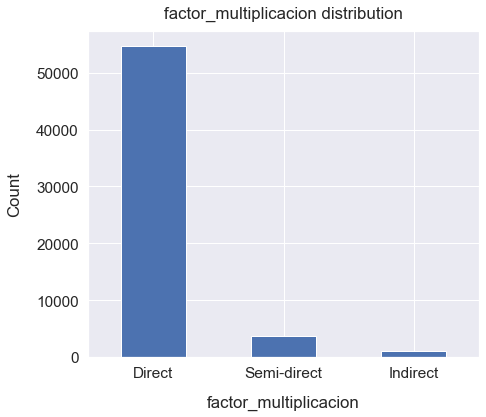

In [145]:
#barplot representing distribution of factor_multiplicacion with lossy
import seaborn as sns
sns.set(font_scale=1.4)
train_dt["factor_multiplicacion"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("factor_multiplicacion", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("factor_multiplicacion distribution", y=1.02);

In [146]:
#correalion table 
pd.crosstab(train_dt.factor_multiplicacion, train_dt.Lossy)

Lossy,0,1
factor_multiplicacion,,
Direct,51212,3434
Indirect,993,125
Semi-direct,3388,268


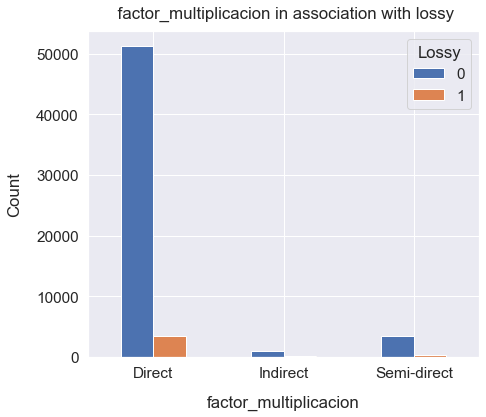

In [147]:
#distribution of factor_multiplicacion in association with lossy
sns.set(font_scale=1.4)
pd.crosstab(train_dt.factor_multiplicacion, train_dt.Lossy).plot(kind='bar',figsize=(7, 6), rot=0)

plt.xlabel("factor_multiplicacion", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title(" factor_multiplicacion in association with lossy", y=1.02);

In [148]:
#correlation percentage with the help of chi_square test
cramers_v(train_dt.factor_multiplicacion, train_dt.Lossy)

0.02803840955612559

### model building

In [38]:
test_dt_1 = test_dt.copy().drop(["row_id"],axis = 1) 

In [40]:
train_dt.shape

(59420, 199)

In [42]:
test_dt_1.shape

(26036, 198)

In [43]:
y = train_dt["Lossy"]

In [45]:
train_dt.dtypes

client_id                  int64
totalizer                 object
Totalizer_0                int64
Totalizer_N                int64
Totalizer_Y                int64
                          ...   
substancian               object
age                      float64
Lossy                      int64
Total_irr_codes_count      int64
Total_obs_codes_count      int64
Length: 199, dtype: object

In [46]:
train_dt = pd.get_dummies(train_dt,columns=["totalizer","substancian","factor_multiplicacion"],drop_first=True)
test_dt_1 = pd.get_dummies(test_dt_1,columns=["totalizer","substancian","factor_multiplicacion"],drop_first=True)

In [48]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59420 entries, 0 to 60747
Columns: 210 entries, client_id to factor_multiplicacion_Semi-direct
dtypes: float64(4), int64(191), object(1), uint8(14)
memory usage: 92.6+ MB


In [51]:
test_dt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26036 entries, 0 to 26035
Columns: 208 entries, Totalizer_0 to factor_multiplicacion_Semi-direct
dtypes: float64(4), int64(189), object(1), uint8(14)
memory usage: 38.9+ MB


In [49]:
train_dt = train_dt.copy().drop(["client_id"],axis = 1) 
test_dt_1 = test_dt_1.copy().drop(["client_id"],axis = 1) 

In [53]:
cols = train_dt.columns
num_cols = train_dt._get_numeric_data().columns
num_cols

Index(['Totalizer_0', 'Totalizer_N', 'Totalizer_Y', 'Single_client',
       'Multi_client', 'client count', 'duration', 'revisions',
       'revision_month', 'revision_year',
       ...
       'substancian_DOSQUEBRADAS', 'substancian_MACARENA',
       'substancian_NARANJITO', 'substancian_PAVAS', 'substancian_POPA',
       'substancian_SUBESTACION BADEA', 'substancian_SUBESTACION PAVAS',
       'substancian_VENTORRILLO', 'factor_multiplicacion_Indirect',
       'factor_multiplicacion_Semi-direct'],
      dtype='object', length=208)

In [54]:
list(set(cols) - set(num_cols))

['average_cons_last_6months']

In [55]:
train_dt = pd.get_dummies(train_dt,columns=["average_cons_last_6months"],drop_first=True)
test_dt_1 = pd.get_dummies(test_dt_1,columns=["average_cons_last_6months"],drop_first=True)

In [58]:
from sklearn.neighbors import KNeighborsClassifier              # kNN classifier
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor
from sklearn.model_selection import GridSearchCV                # Grid search with CV
from sklearn.metrics import confusion_matrix,mean_squared_error,adjusted_rand_score,accuracy_score # Error Metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler   # To Scale the data
from sklearn.model_selection import train_test_split, GridSearchCV          # To split the data

from sklearn.cluster import KMeans,AgglomerativeClustering 

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn import tree

import pandas_profiling as pp

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_dt, y, test_size=0.20)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47536, 10323)
(11884, 10323)
(47536,)
(11884,)


In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#training the model
logreg = LogisticRegression()
lr_clf = logreg.fit(X_train,y_train) #or mat which is in dense format can also be used

#prediction on train data
train_pred_log = lr_clf.predict(X_train)

#predicting on test data
test_pred_log= lr_clf.predict(X_test)

In [129]:
from sklearn.metrics import f1_score

In [132]:
f1_train_r_log=f1_score( X_train, train_pred_log, labels=None, pos_label=1, average='binary')
f1_test_r_log=f1_score( y_test, test_pred_log, labels=None, pos_label=1, average='binary')
print(f1_train_r_log)
print(f1_test_r_log)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [119]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

 

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],}

 
log_grid_r= GridSearchCV(estimator = LogisticRegression(penalty='l2'), param_grid = param_grid, cv =None)

In [112]:
#training the model
lr_clf = log_grid_r.fit(X_train,y_train) #or mat which is in dense format can also be used

#prediction on train data
train_pred_log = lr_clf.predict(X_train)

#predicting on test data
test_pred_log = lr_clf.predict(X_test)

In [113]:
f1_train_r_log=f1_score( y_train, train_pred_log, labels=None, pos_label=0, average='binary')
f1_test_r_log=f1_score( y_test_r, test_pred_log, labels=None, pos_label=0, average='binary')
print(f1_train_r_log)
print(f1_test_r_log)

0.9235400361228175
0.7425742574257426


## random forest 

In [64]:
#build a random forest classifiers
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [65]:
rf_clf = rf.fit(X_train,y_train)
#prediction on train data
train_pred_r = rf_clf.predict(X_train)

#predicting on test data
test_pred_r = rf_clf.predict(X_train)

In [66]:
f1_train_r_rf=f1_score( X_train, train_pred_r, labels=None, pos_label=1, average='binary')
f1_test_r_rf=f1_score( Y_test, test_pred_r, labels=None, pos_label=1, average='binary')
print(f1_train_r_rf)
print(f1_test_r_rf)

0.9769094138543517
0.5754189944134079


### obeservation from this data 

1. totalizer column is sparsely distributed in predicting the lossy
2. client count doesnot have much help in predicting the lossy
3. capacidad is highly ditributed between 0-500 so majority of the prediction that we can do can be from this range itself
4. irr codes count columns can be grouped into one column to know the total loss from it as a whole
5. obs codes count loss column can again also be grouped into one column consisting of all the total loss as a whole
6. single client and multi client are highly correlated and using one of the either two would be enough in predicting our trget attribute
7. duration does not help in predicting our target
8. min consumption and min consumption updated are both highly correlated so using either one can be enough in our prediction
